In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [18]:
y = df["Outcome"]
x = df.iloc[:,0:-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/4, random_state = 1)


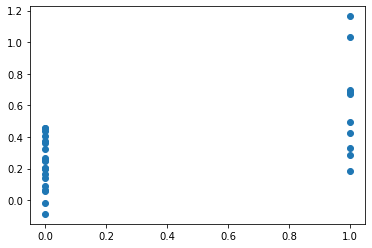

In [60]:
clf = LinearRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
plt.scatter(y_test[:30],y_pred[:30])

In [68]:
predictions = pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
predictions 

,Actual Value,Predicted Value,Difference
285,0,0.454436,-0.454436
101,0,0.375189,-0.375189
581,0,0.205032,-0.205032
352,0,-0.015283,0.015283
726,0,0.267887,-0.267887
...,...,...,...
247,0,0.675746,-0.675746
189,1,0.400850,0.599150
139,0,0.261885,-0.261885
518,0,0.295789,-0.295789


In [84]:
for i in range(len(y_test)):
    print("for the values:\n",x_test.iloc[i])
    if y_pred[i] < 0.5:
        print("\033[1m doesnt have diabetes \033[0m")
    else:
        print("\033[1m has diabetes \033[0m")

for the values:
 Pregnancies                   7.000
Glucose                     136.000
BloodPressure                74.000
SkinThickness                26.000
Insulin                     135.000
BMI                          26.000
DiabetesPedigreeFunction      0.647
Age                          51.000
Name: 285, dtype: float64
 doesnt have diabetes 
for the values:
 Pregnancies                   1.000
Glucose                     151.000
BloodPressure                60.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          26.100
DiabetesPedigreeFunction      0.179
Age                          22.000
Name: 101, dtype: float64
 doesnt have diabetes 
for the values:
 Pregnancies                   6.000
Glucose                     109.000
BloodPressure                60.000
SkinThickness                27.000
Insulin                       0.000
BMI                          25.000
DiabetesPedigreeFunction      0.206
Age                    

In [44]:
rmse = np.sqrt(np.mean(y_test-y_pred)**2)
print("Root mean squared error is:",rmse)

Root mean squared error is: 0.003562717698523678
